In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, sweep_poly
from librosa import cqt,stft, note_to_hz, pseudo_cqt
from librosa.feature import melspectrogram
import sys
from scipy.io import wavfile

sys.path.insert(0,'../Installation/nnAudio') # for debugging purpose
import Spectrogram # for debugging purpose
# from nnAudio import Spectrogram
import torch
import torch.nn as nn

In [2]:
cmap = 'jet'
fmin = note_to_hz('A1') # for CQT use

fs = 44100
t = 1
f0 = 55
f1 = 22050

# parameters for CQT
bins_per_octave = 24
n_bins = int(bins_per_octave*7.5)

epsilon = 1e-5 # for taking log
device = 'cpu'

# Getting a linear sine sweep

(-499.95000000000005, 10498.95, -1.1, 1.1)

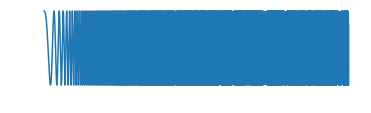

In [3]:
s = np.linspace(0,t, fs*t)
x = chirp(s, f0, 1, f1, method='linear')
x= x.astype(dtype=np.float32)

plt.figure(figsize=(6,1.5))
plt.plot(x[:10000])
plt.axis('off')

# Comparing CQT results

## nnAudio

Low pass filter created, time used = 0.0027 seconds
num_octave =  9
No early downsampling is required, downsample_factor =  1
Early downsampling filter created,                         time used = 0.0003 seconds
CQT kernels created, time used = 0.0067 seconds
CQT kernels created, time used = 0.2565 seconds


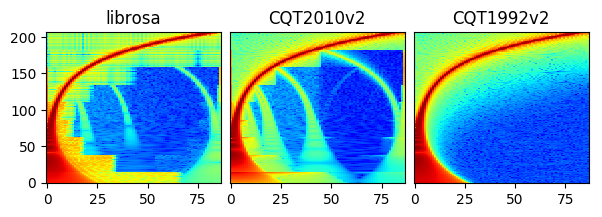

In [4]:
r=2
bins_per_octave = 12*r
n_bins = 104*r-1
CQT_layer1 = Spectrogram.CQT2010v2(fs, fmin=fmin, n_bins=n_bins, bins_per_octave=bins_per_octave, device=device)
CQT_layer2 = Spectrogram.CQT1992v2(fs, fmin=fmin, n_bins=n_bins, bins_per_octave=bins_per_octave, device=device)

cqt_x1 = CQT_layer1(torch.tensor(x[None, None, :]))
cqt_x2 = CQT_layer2(torch.tensor(x[None, None, :]))
output_lib = cqt(x, sr=fs, fmin=fmin, n_bins=n_bins, bins_per_octave=bins_per_octave)

fig , ax = plt.subplots(1,3, dpi=100, figsize=(7,2))

im1 = ax[0].imshow(np.log(abs(output_lib)), aspect='auto', origin='lower', cmap=cmap)
im2 = ax[1].imshow(np.log(cqt_x1[0]), aspect='auto', origin='lower', cmap=cmap)
im3 = ax[2].imshow(np.log(cqt_x2[0]), aspect='auto', origin='lower', cmap=cmap)
ax[0].set_title('librosa')
ax[1].set_title('CQT2010v2')
ax[2].set_title('CQT1992v2')
ax[1].set_yticks([])
ax[2].set_yticks([])
fig.subplots_adjust(wspace = 0.05)